In [29]:
import torch
from torch.autograd import Variable
x = Variable(torch.Tensor([3]), requires_grad = True) 
y = Variable(torch.Tensor([5]), requires_grad = True)
z = 2*x + 10*y
z.backward()
print(z)
print(y.grad.data)
weight = torch.Tensor([1,2,1,1,10])
loss_fn = torch.nn.CrossEntropyLoss(reduce=False, size_average=False, weight=weight)
input = Variable(torch.randn(3, 5)) # (batch_size, C)
target = Variable(torch.LongTensor(3).random_(2))
print(target)
loss = loss_fn(input, target)
print(input); print(target); print(loss)

tensor([ 56.])
tensor([ 10.])
tensor([ 0,  0,  1])
tensor([[-0.1385,  0.5230, -2.1348,  0.0034, -1.0488],
        [ 0.1239, -0.0051, -1.3888,  1.6071, -0.0133],
        [-0.4182,  0.0024, -1.4328, -1.1382,  0.9048]])
tensor([ 0,  0,  1])
tensor([ 1.5322,  1.9985,  3.0865])


### 使用pytorch进行线性回归

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel_launcher.py:37: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[20/1000], loss: 0.169054
Epoch[40/1000], loss: 0.169026
Epoch[60/1000], loss: 0.169006
Epoch[80/1000], loss: 0.168992
Epoch[100/1000], loss: 0.168982
Epoch[120/1000], loss: 0.168975
Epoch[140/1000], loss: 0.168970
Epoch[160/1000], loss: 0.168967
Epoch[180/1000], loss: 0.168964
Epoch[200/1000], loss: 0.168962
Epoch[220/1000], loss: 0.168961
Epoch[240/1000], loss: 0.168960
Epoch[260/1000], loss: 0.168959
Epoch[280/1000], loss: 0.168959
Epoch[300/1000], loss: 0.168959
Epoch[320/1000], loss: 0.168958
Epoch[340/1000], loss: 0.168958
Epoch[360/1000], loss: 0.168958
Epoch[380/1000], loss: 0.168958
Epoch[400/1000], loss: 0.168958
Epoch[420/1000], loss: 0.168958
Epoch[440/1000], loss: 0.168958
Epoch[460/1000], loss: 0.168957
Epoch[480/1000], loss: 0.168957
Epoch[500/1000], loss: 0.168957
Epoch[520/1000], loss: 0.168957
Epoch[540/1000], loss: 0.168957
Epoch[560/1000], loss: 0.168957
Epoch[580/1000], loss: 0.168957
Epoch[600/1000], loss: 0.168957
Epoch[620/1000], loss: 0.168957
Epoch[640/10

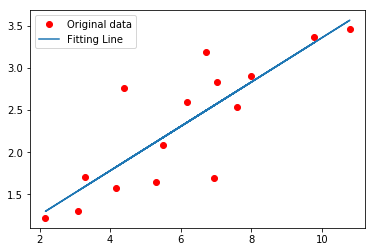

In [23]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        out = self.linear(x)
        return out
model = linearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)
    out = model.forward(inputs)
    loss = criterion(out, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))
model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

### 使用pytorch训练LR

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel_launcher.py:38: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch0/10000 Loss:1.0978107452392578
Epoch1000/10000 Loss:0.8074660301208496
Epoch2000/10000 Loss:0.6269387006759644
Epoch3000/10000 Loss:0.5162513256072998
Epoch4000/10000 Loss:0.4458141326904297
Epoch5000/10000 Loss:0.39854496717453003
Epoch6000/10000 Loss:0.36517515778541565
Epoch7000/10000 Loss:0.34057724475860596
Epoch8000/10000 Loss:0.3217889666557312
Epoch9000/10000 Loss:0.3070142865180969
[Parameter containing:
tensor([[ 0.6075,  0.1819]]), Parameter containing:
tensor([-0.1791])]


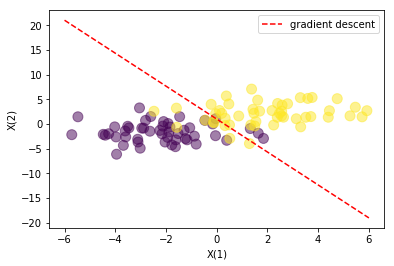

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.autograd import Variable


# 准备训练集数据
sample_num = 100
sample_dim = 2
data = np.random.randn(sample_num, sample_dim) * 2
# center the first N/2 points at (-2,-2)
data[:sample_num//2,:] = data[:sample_num//2,:] - 2*np.ones((sample_num//2,sample_dim))

# center the last N/2 points at (2, 2)
data[sample_num//2:,:] = data[sample_num//2:,:] + 2*np.ones((sample_num//2,sample_dim))
label = np.array([0] * (sample_num // 2) + [1] * (sample_num // 2)).reshape(sample_num, 1)
train_x = Variable(torch.Tensor(data))
train_y = Variable(torch.Tensor(label))

# 定义模型
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(sample_dim, 1)
    def forward(self, x):
        out = F.sigmoid(self.linear(x))
        return out

model = LogisticRegression()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

epoch_num = 10000
for epoch in range(epoch_num):
    y_pred = model(train_x)
    loss = criterion(y_pred, train_y)
    if epoch % 1000 == 0:
        print("Epoch{}/{} Loss:{}".format(epoch, epoch_num, loss.data[0]))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
w = list(model.parameters())
print(w)
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

# plot the data and separating line
plt.scatter(train_x[:,0], train_x[:,1], c=train_y.reshape(sample_num), s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
line_up, = plt.plot(x_axis, y_axis,'r--', label='gradient descent')
plt.legend(handles=[line_up])
plt.xlabel('X(1)')
plt.ylabel('X(2)')
plt.show()

None
None
None
[[ 0.75776298  0.58416122  0.37816607  0.15120053 -0.08414951 -0.31483322
  -0.52805853 -0.71200149 -0.85646195 -0.95342916 -0.99752601 -0.9863072
  -0.92039486 -0.80344401 -0.6419399  -0.44483839 -0.22306934  0.01106955
   0.24459459  0.46455617  0.65875679  0.81642748  0.92882494  0.98971641
   0.9957253   0.94651838  0.84482433  0.69628237  0.50912957  0.29374409
   0.06206967 -0.1730467  -0.39856713 -0.60198588 -0.77202281 -0.89924887
  -0.97660903 -0.99981344 -0.96757535 -0.88168246 -0.74689777 -0.57069547
  -0.36284649 -0.13487663  0.10057251  0.33044462  0.54199264  0.72348563
   0.86485928  0.95827403  0.99854975  0.98345306  0.91382109  0.79351515
   0.62920653  0.43000663  0.20696163 -0.02755998 -0.2605533  -0.47909821
  -0.67107576 -0.82584025 -0.93480955 -0.991941   -0.9940665  -0.94106819
  -0.83588497 -0.68434956 -0.49486501 -0.27793879 -0.04560008  0.18926729
   0.41363925  0.61507373  0.78240063  0.90634119  0.98002255  0.99935888
   0.96327791  0.8737804

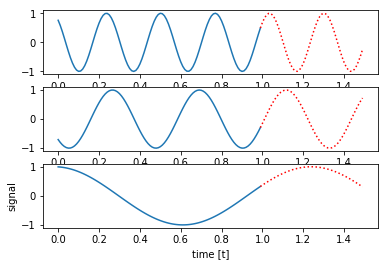

In [92]:
import numpy as np
from typing import Optional, Tuple


def generate_sample(f: Optional[float] = 1.0, t0: Optional[float] = None, batch_size: int = 1,
                    predict: int = 50, samples: int = 100) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Generates data samples.
    :param f: The frequency to use for all time series or None to randomize.
    :param t0: The time offset to use for all time series or None to randomize.
    :param batch_size: The number of time series to generate.
    :param predict: The number of future samples to generate.
    :param samples: The number of past (and current) samples to generate.
    :return: Tuple that contains the past times and values as well as the future times and values. In all outputs,
             each row represents one time series of the batch.
    """
    Fs = 100

    T = np.empty((batch_size, samples))
    Y = np.empty((batch_size, samples))
    FT = np.empty((batch_size, predict))
    FY = np.empty((batch_size, predict))

    _t0 = t0
    for i in range(batch_size):
        t = np.arange(0, samples + predict) / Fs
        if _t0 is None:
            t0 = np.random.rand() * 2 * np.pi
        else:
            t0 = _t0 + i/float(batch_size)

        freq = f
        if freq is None:
            freq = np.random.rand() * 3.5 + 0.5
        print(f)
        y = np.sin(2 * np.pi * freq * (t + t0))

        T[i, :] = t[0:samples]
        Y[i, :] = y[0:samples]

        FT[i, :] = t[samples:samples + predict]
        FY[i, :] = y[samples:samples + predict]

    return T, Y, FT, FY


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    # noinspection PyUnresolvedReferences
    import seaborn as sns

    t, y, t_next, y_next = generate_sample(f=None, t0=None, samples = 100, batch_size=3)
    print(y)
    n_tests = t.shape[0]
    for i in range(0, n_tests):
        plt.subplot(n_tests, 1, i+1)
        plt.plot(t[i, :], y[i, :])
        plt.plot(np.append(t[i, -1], t_next[i, :]), np.append(y[i, -1], y_next[i, :]), color='red', linestyle=':')

    plt.xlabel('time [t]')
    plt.ylabel('signal')
    plt.show()